# All Subjects ERPs Analysis

## Load data and perform piperline for all subjects

In [1]:
%%capture

import sys
sys.path.append("..")

import mne
import os
from mne_bids import BIDSPath, read_raw_bids
from src.utils import load_subject, pipeline, perform_tfr
from src.plots import plot_spectra, plot_topomaps
from matplotlib import pyplot as plt

# Set BIDS path
bids_path = BIDSPath(root='../data', task='jacobsen', suffix='eeg')

# List of all subject BIDS path
all_sub_paths = bids_path.match()

# Create dictionary to store individual subject ephochs and power spectra
sub_epochs = {'regular': [], 'random': []}
sub_evoked = {'regular': [], 'random': []}
sub_powers = {'regular': [], 'random': []}


for sub_path in all_sub_paths:
        # Load data
        raw = load_subject(sub_path)

        # Execute filtering + cleaning data pipeline
        raw, epochs = pipeline(
            raw,
            tmin = -1,
            tmax = 3,
            #reject_amp = 75e-6,  # ±μ75 (if commented out doea not reject components)
            perform_ica = False # ICA doesn't drop any componens
        )

        powers = perform_tfr(epochs)

        # Save individual subject epochs and power spectra
        sub_epochs['regular'].append(epochs['regular'])
        sub_epochs['random'].append(epochs['random'])
        sub_evoked['regular'].append(epochs['regular'].average())
        sub_evoked['random'].append(epochs['random'].average())
        sub_powers['regular'].append(powers['regular'])
        sub_powers['random'].append(powers['random'])


## Save TFR plots for every subject

In [2]:
%%capture

for i, sub in enumerate(all_sub_paths):
    sub_name= str(sub)[8:15]
    print(sub_name)
    
    spectra = {
        'regular': sub_powers['regular'][i],
        'random': sub_powers['random'][i]
    }
    
    # Create the directory if it doesn't exist
    os.makedirs(f'../plots/{sub_name}', exist_ok=True)

    # Save plots
    save_path = f'../plots/{sub_name}/{sub_name}_tfr'
    plot_spectra(spectra, title=f'{sub_name} - TFR', save_path=save_path)


### Grand Avarage

Identifying common channels ...
Identifying common channels ...
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/Users/saponaro/Developer/uni/eeg_penguin/.venv/lib/python3.12/site-packages/mne/baseline.py:117: RuntimeWarning: invalid value encountered in log10
  np.log10(d, out=d)


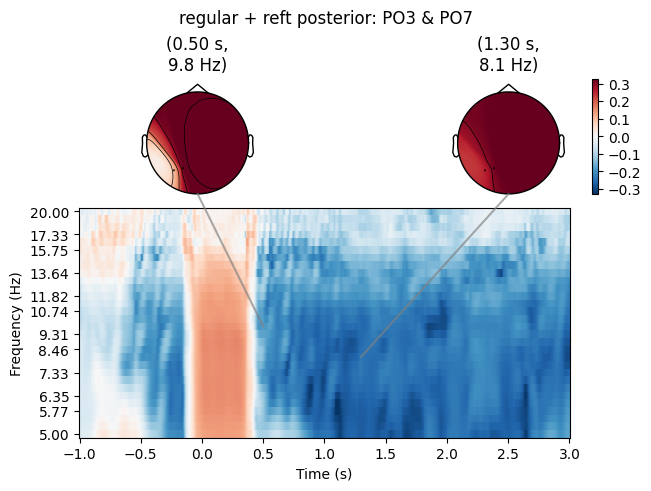

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


/Users/saponaro/Developer/uni/eeg_penguin/.venv/lib/python3.12/site-packages/mne/baseline.py:117: RuntimeWarning: invalid value encountered in log10
  np.log10(d, out=d)


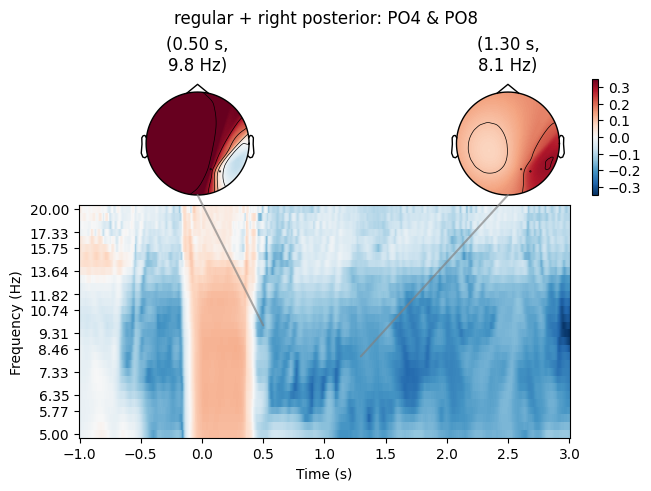

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


/Users/saponaro/Developer/uni/eeg_penguin/.venv/lib/python3.12/site-packages/mne/baseline.py:117: RuntimeWarning: invalid value encountered in log10
  np.log10(d, out=d)


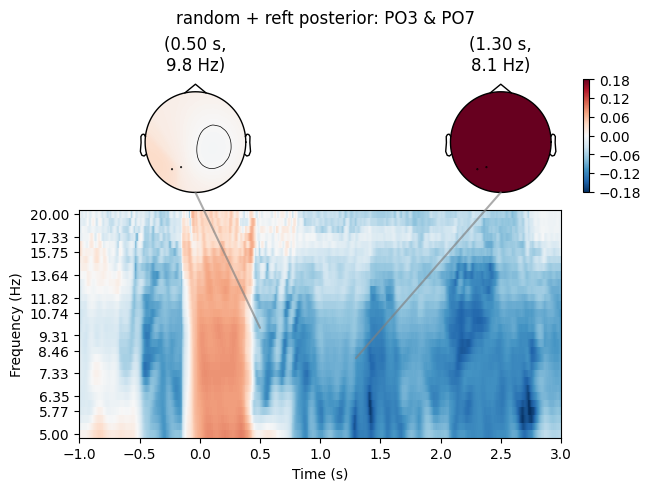

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


/Users/saponaro/Developer/uni/eeg_penguin/.venv/lib/python3.12/site-packages/mne/baseline.py:117: RuntimeWarning: invalid value encountered in log10
  np.log10(d, out=d)


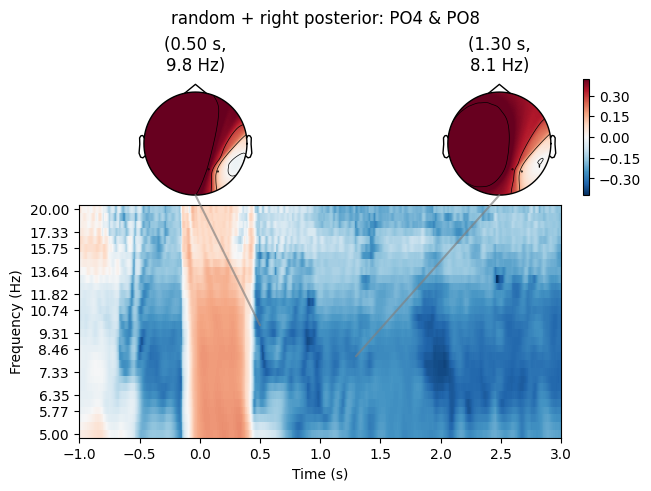

Plot saved as ../plots/sub-avg/sub-avg_tfr


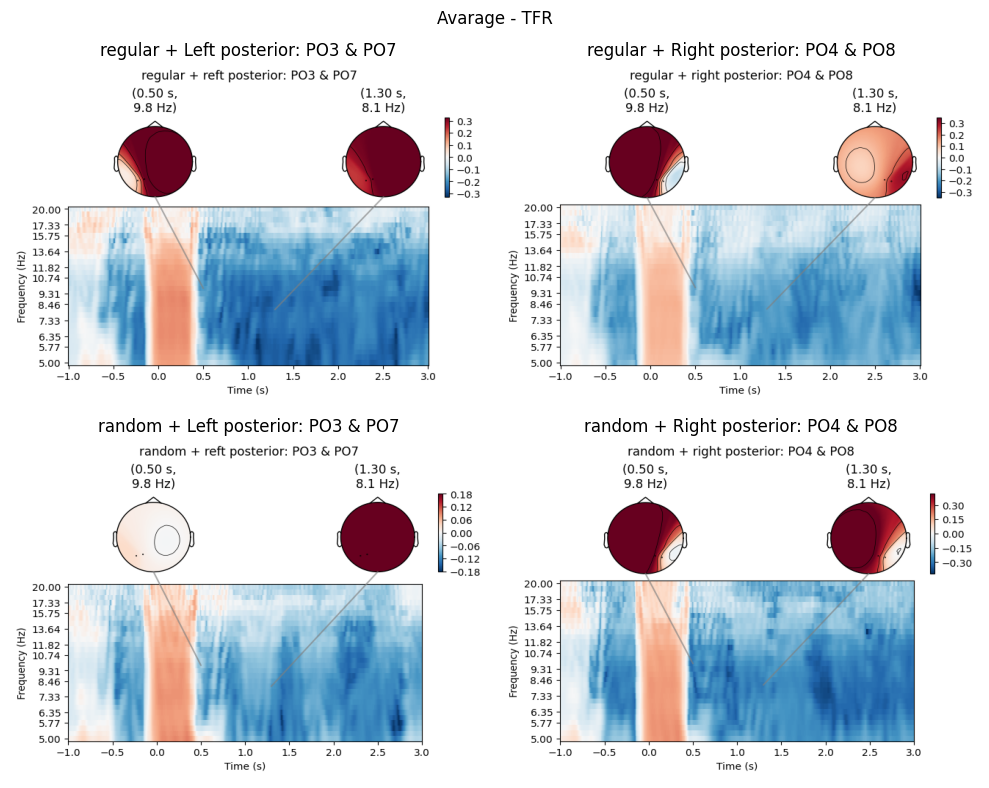

In [3]:
grand_avg= {'regular': mne.grand_average(sub_evoked['regular']), 
            'random': mne.grand_average(sub_evoked['random'])}

# Save plots
spectra = perform_tfr(grand_avg)

# Create the directory if it doesn't exist
os.makedirs(f'../plots/sub-avg', exist_ok=True)

save_path = f'../plots/sub-avg/sub-avg_tfr'
plot_spectra(spectra, title=f'Avarage - TFR', save_path=save_path)

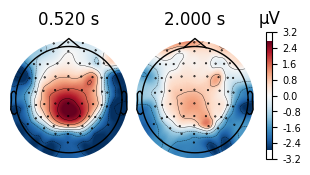

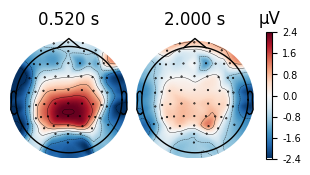

Plot saved as ../plots/sub-avg/sub-avg_topo


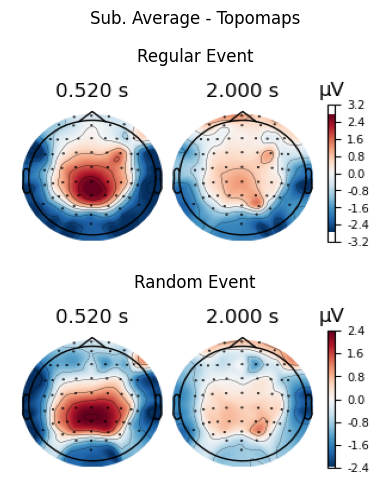

In [4]:
# Create the directory if it doesn't exist
os.makedirs(f'../plots/sub-avg', exist_ok=True)

save_path = f'../plots/sub-avg/sub-avg_topo'
plot_topomaps(grand_avg, title='Sub. Average - Topomaps', save_path=save_path)

### Topomaps animation

In [5]:
%%capture
import numpy as np
from IPython.display import HTML
fig, anim = grand_avg['regular'].animate_topomap(ch_type="eeg", frame_rate=2, blit=False);


In [6]:
HTML(anim.to_jshtml())

Initializing animation...
